<a href="https://colab.research.google.com/github/mahdiehmortazavi/EDA-for-Datasets/blob/main/petroleum_transportation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection and Loading

Imports the necessary libraries for the Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

If working in a Google Colab environment, should download and unzip a dataset related to petroleum transportation. This step is crucial for obtaining the dataset and preparing it for analysis.

In [ ]:
# Load the dataset from Kaggle
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mahdieh002/petroleum-transportation

!unzip petroleum-transportation.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mahdieh002/petroleum-transportation
License(s): CC-BY-SA-4.0
petroleum-transportation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  petroleum-transportation.zip
replace Refinery.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Refinery.csv            


After downloading and extracting the dataset, reads the data into a DataFrame, which is the standard format for data manipulation and analysis in Python.




In [ ]:
df = pd.read_csv('Refinery.csv')

# 2.  Data Overview



*   This step is essential for understanding the initial state of the dataset, including column names, data types, and a sample of the data. It helps identify potential issues like missing values or incorrect data types early in the analysis.
*   Descriptive statistics are vital for understanding the distribution and variability of numerical data. This step can reveal outliers or unexpected patterns that may require further investigation or preprocessing. It provides insights into the variety of categories and the dominance of certain values, which can inform feature engineering decisions later in the analysis.



In [ ]:
df.head()

,Work shift,Type,Refinery,Origin Departure Date,Origin Net Weight,Destination Arrival Date,Destination Net Weight
0,Day shift,VB,Tehran,1398/12/28,24040,1399/01/01,24030
1,Day shift,VB,Tehran,1398/12/28,23720,1399/01/01,23700
2,Day shift,VB,Tehran,1398/12/27,26080,1399/01/01,25980
3,Day shift,VB,Tehran,1398/12/28,23260,1399/01/01,23700
4,Day shift,VB,Tehran,1398/12/29,26380,1399/01/02,26300


In [ ]:
df.tail()

,Work shift,Type,Refinery,Origin Departure Date,Origin Net Weight,Destination Arrival Date,Destination Net Weight
260,Evening shift,Condensate,South Pars,1399/03/19,22696,1399/03/20,22670
261,Evening shift,Condensate,South Pars,1399/03/19,22692,1399/03/20,22690
262,Evening shift,Condensate,South Pars,1399/03/19,22748,1399/03/20,22670
263,Evening shift,Condensate,South Pars,1399/03/19,20574,1399/03/20,20430
264,Evening shift,Condensate,South Pars,1399/03/20,22665,1399/03/20,22550


In [ ]:
# Summary of dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Work shift                265 non-null    object
 1   Type                      265 non-null    object
 2   Refinery                  265 non-null    object
 3   Origin Departure Date     265 non-null    object
 4   Origin Net Weight         265 non-null    int64 
 5   Destination Arrival Date  265 non-null    object
 6   Destination Net Weight    265 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 14.6+ KB


In [ ]:
# Statistical summary of categorical features
df.describe(include=[object])  # For columns with data type 'object'

,Work shift,Type,Refinery,Origin Departure Date,Destination Arrival Date
count,265,265,265,265,265
unique,3,4,4,41,40
top,Day shift,VB,Shiraz,1399/01/25,1399/01/26
freq,130,206,123,28,30


In [ ]:
# Statistical summary of numerical features
df.describe(include=[np.number])  # Explicitly focusing on numeric columns

,Origin Net Weight,Destination Net Weight
count,265.000000,265.000000
mean,24305.852830,24296.981132
std,1532.788422,1533.901721
min,15050.000000,15110.000000
25%,23300.000000,23410.000000
50%,24380.000000,24340.000000
75%,25250.000000,25230.000000
max,28770.000000,28720.000000


# 3. Data Cleaning

## 3.1.Missing Value Handling

Identifying missing data is crucial as it can significantly impact analysis and modeling. Depending on the severity, missing values can be imputed, removed, or handled in other ways. This step helps decide the next course of action regarding data cleaning.

In [ ]:
# Checking for missing values
print(df.isnull().sum())

Work shift                  0
Type                        0
Refinery                    0
Origin Departure Date       0
Origin Net Weight           0
Destination Arrival Date    0
Destination Net Weight      0
dtype: int64


## 3.2. Duplicate Handling

The goal of this is to ensure that the dataset does not contain duplicate rows, which can skew analysis results and negatively impact the performance of machine learning models. Duplicates may arise due to data entry errors or merging datasets without proper checks.

In [ ]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1


Removing duplicates can significantly reduce the size of the dataset and eliminate redundant information. This step ensures that each observation in the dataset is unique, providing more reliable and interpretable analysis results.

In [ ]:
# Remove duplicates in-place
df.drop_duplicates(inplace=True)

In [ ]:
# Check Count the number of duplicate rows again
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## 3.3. Outlier Handling

Boxplots are a common tool for detecting outliers. In a boxplot, any data points that fall outside of the "whiskers" are typically considered outliers. This visualization helps identify the presence of extreme values in the data.

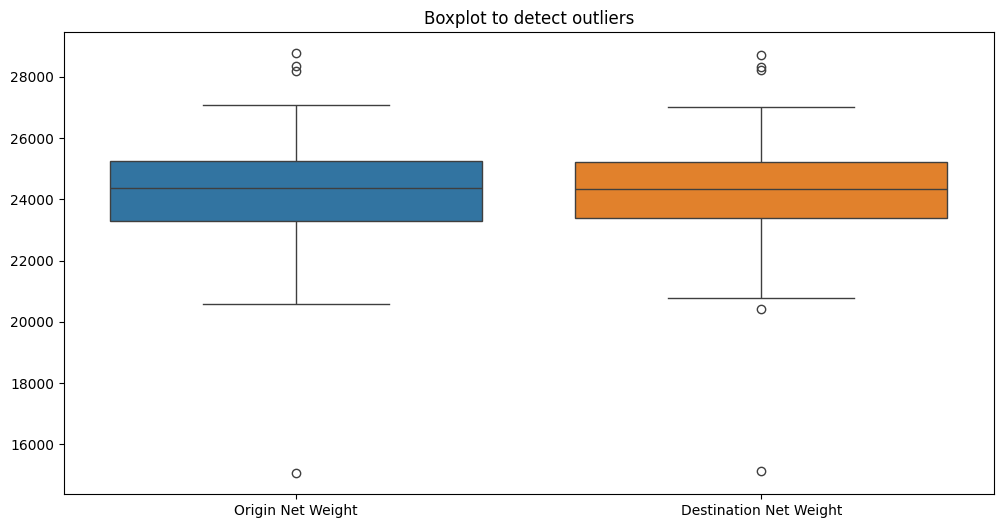

In [ ]:
# Detecting and handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Origin Net Weight', 'Destination Net Weight']])
plt.title('Boxplot to detect outliers')
plt.show()



*   These bounds are used to identify outliers. Values below the 5th percentile or above the 95th percentile are considered extreme and are potential outliers. This method is more robust than using the mean and standard deviation because it is less sensitive to the presence of extreme values.
*   Capping is a method of handling outliers that brings extreme values within a specified range without removing data points entirely. This can be useful when outliers are not errors but rather extreme cases that should be moderated rather than excluded.



In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the lower and upper bounds for capping
lower_bound = numeric_cols.quantile(0.05)
upper_bound = numeric_cols.quantile(0.95)

# Apply capping to numeric columns only
df[numeric_cols.columns] = numeric_cols.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name],
                                                                 np.where(x < lower_bound[x.name], lower_bound[x.name], x)))

*   The transformation has effectively reduced the influence of extreme values. This is beneficial because extreme outliers can disproportionately affect model training and lead to poor generalization on unseen data.
*   The capping method has resulted in more consistent data, which should improve the reliability of any statistical analysis or predictive modeling performed on this dataset.

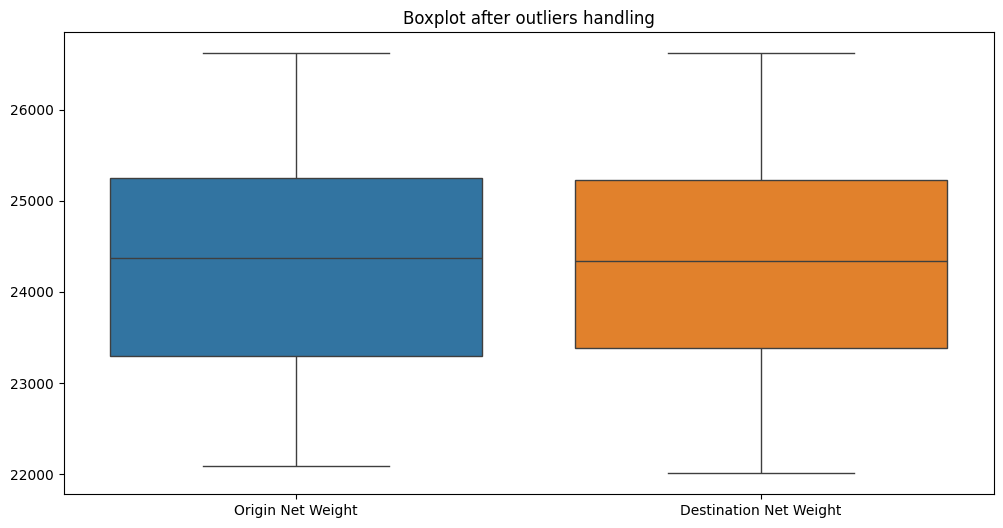

In [ ]:
# Plot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Origin Net Weight', 'Destination Net Weight']])
plt.title('Boxplot after outliers handling')
plt.show()

# 4. Data Exploration

## 4.1. Univariate Analysis

It shows the frequency of data points within specified ranges (bins). This helps in identifying patterns such as skewness, modality (e.g., unimodal or bimodal), and the presence of outliers.

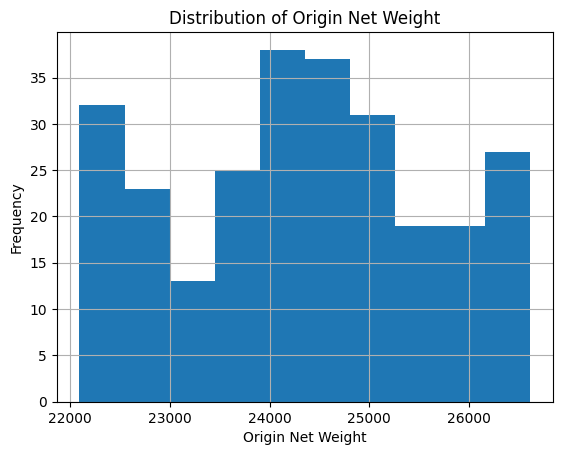

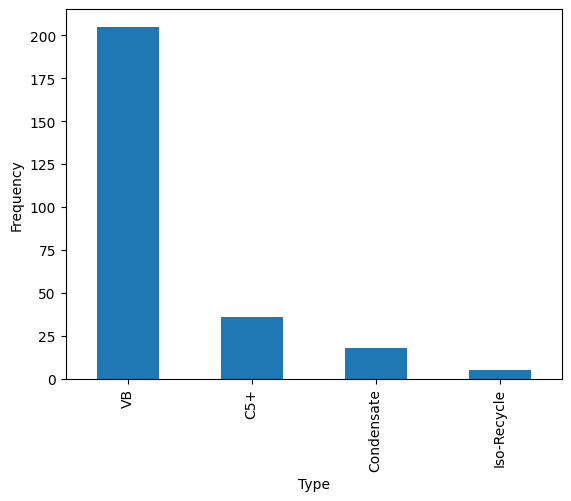

In [ ]:
# Numerical data distribution for Origin Net Weight
df['Origin Net Weight'].hist()
plt.xlabel('Origin Net Weight')  # Title for the x-axis
plt.ylabel('Frequency')  # Title for the y-axis
plt.title('Distribution of Origin Net Weight')
plt.show()

# Categorical data distribution for Type
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')  # Title for the x-axis
plt.ylabel('Frequency')
plt.show()


## 4.2. Bivariate  Analysis



*   Scatter plots are excellent for identifying relationships between two numerical variables. This plot will show if there is a correlation, such as a linear or non-linear relationship, between the weights at the origin and the destination. Clusters or outliers may also be identified through this visualization.
*   Box plots are useful for comparing distributions across groups. This visualization will show the central tendency and spread of Destination Net Weight for each Refinery, as well as any potential outliers within each group. It’s useful for identifying whether different refineries have significantly different weight distributions.



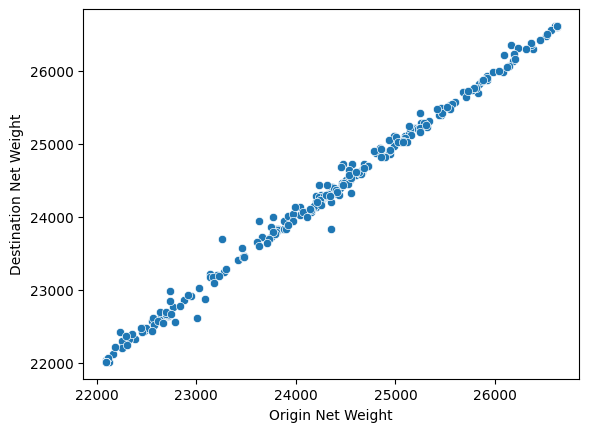

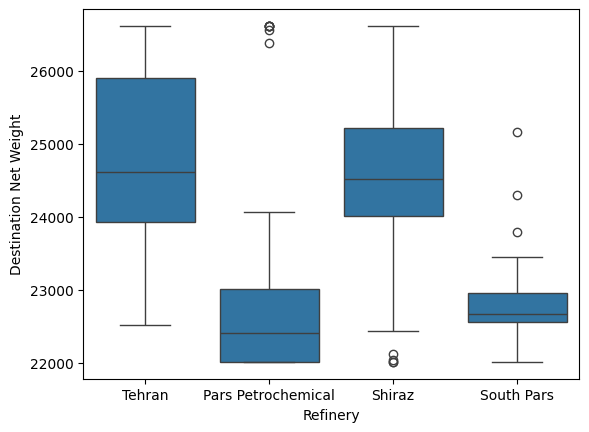

In [ ]:
# Scatter plot for numeric features
sns.scatterplot(x='Origin Net Weight', y='Destination Net Weight', data=df)
plt.show()

# Box plot for categorical vs numeric
sns.boxplot(x='Refinery', y='Destination Net Weight', data=df)
plt.show()

## 4.3. Multivariate Analysis

This plot is powerful for exploring potential relationships and interactions between multiple variables at once. It also helps in spotting correlations and distribution trends in the data.

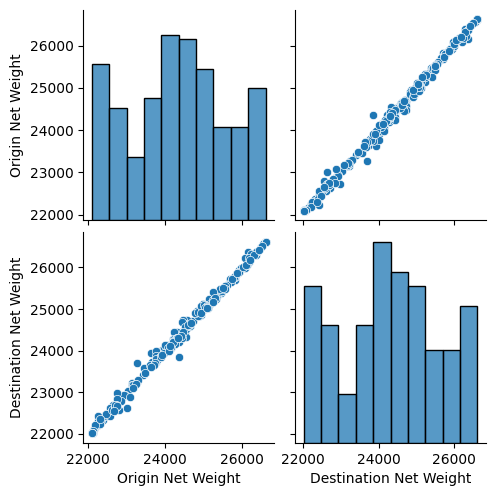

In [ ]:
sns.pairplot(df)
plt.show()

Violin plots combine box plots and KDE (Kernel Density Estimation) plots to show the distribution of the data. This is useful for understanding how Destination Net Weight varies across different categories, showing both the central tendency and the full distribution shape.

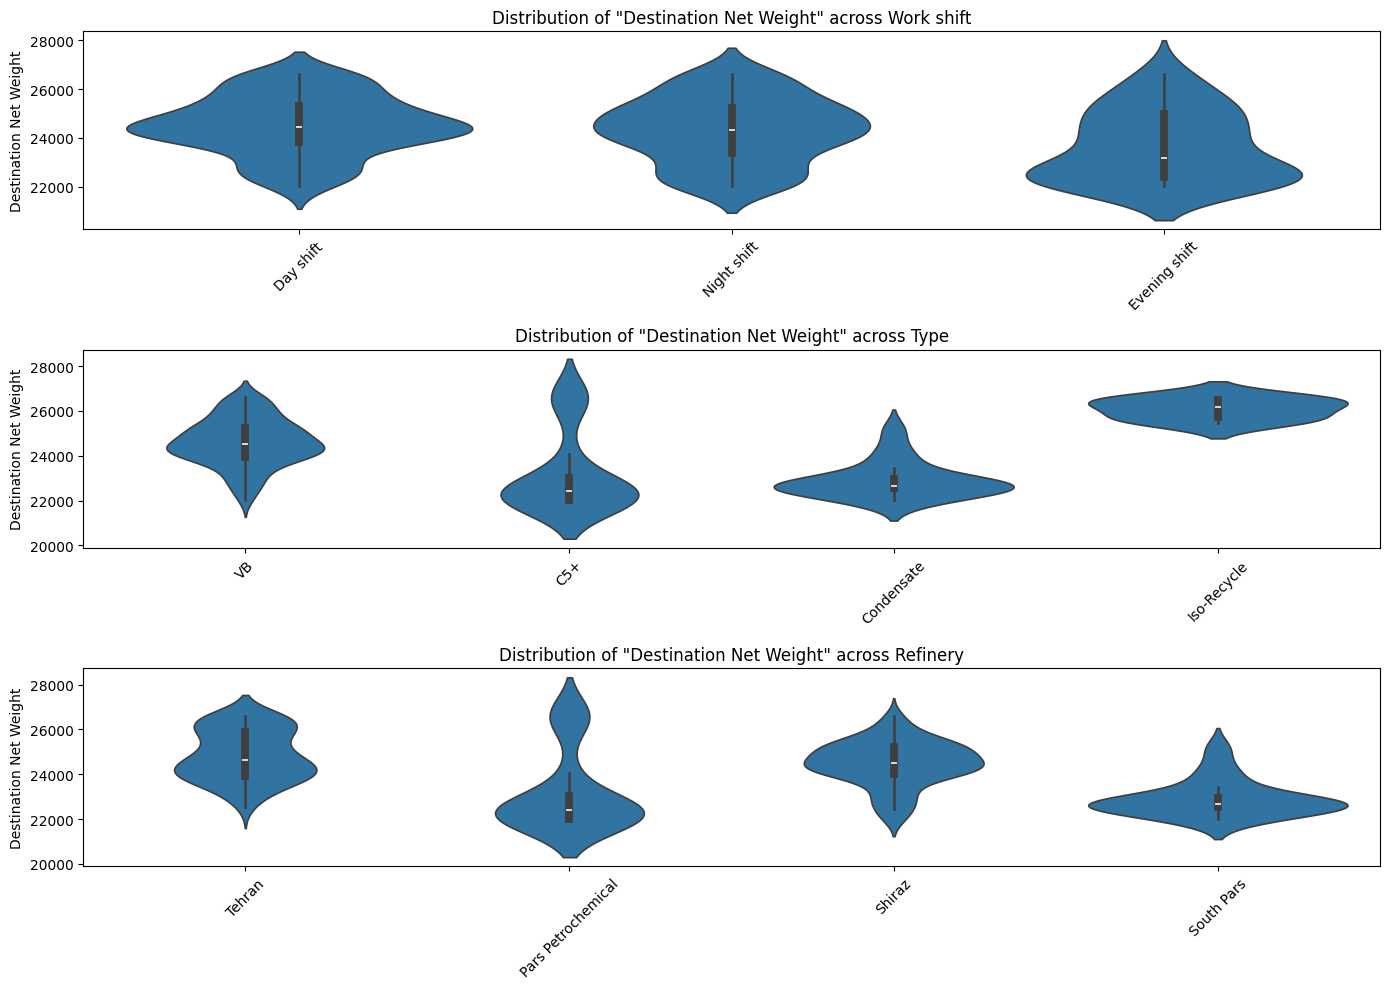

In [ ]:
from matplotlib.ticker import FixedLocator

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Loop through each axis and the corresponding categorical column name
for ax, cat_col in zip(axes, ['Work shift', 'Type', 'Refinery']):
    sns.violinplot(x=cat_col, y='Destination Net Weight', data=df, ax=ax)
    ax.set_title(f'Distribution of "Destination Net Weight" across {cat_col}')
    ax.set_xlabel('')  # Clear the x-axis label if redundant

    # Set tick labels without causing a warning
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout to prevent overlap and ensure everything fits well
plt.tight_layout()
plt.show()

## 4.4. Correlation Matrix

A correlation matrix is crucial for understanding the linear relationships between numerical variables. The heatmap visualizes these correlations, with color coding indicating the strength of the relationships. This can help identify highly correlated features, which might be redundant and could be considered for removal in the modeling phase to reduce multicollinearity.

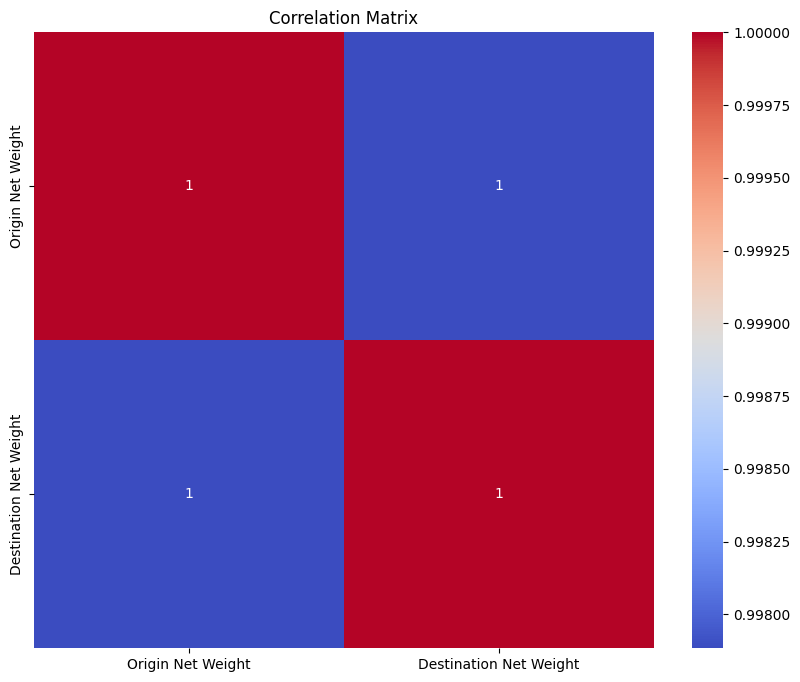

Refinery       Pars Petrochemical  Shiraz  South Pars  Tehran
Work shift                                                   
Day shift                      12      59           2      57
Evening shift                  12       4           9      14
Night shift                    12      59           7      17


In [ ]:
# Filter out non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Crosstab for categorical data
crosstab_result = pd.crosstab(df['Work shift'], df['Refinery'])
print(crosstab_result)

# 5. Feature Engineering

## 5.1. Feature Creation

Creating this feature allows for more in-depth analysis, such as determining whether certain conditions or categories are associated with larger discrepancies. This feature can also be used in predictive modeling to explain or predict outcomes related to transport efficiency or losses.

In [ ]:
# Creating new features from existing ones (if applicable)
# Creating a feature for weight difference
df['Weight Difference'] = df['Origin Net Weight'] - df['Destination Net Weight']

df.head()

,Work shift,Type,Refinery,Origin Departure Date,Origin Net Weight,Destination Arrival Date,Destination Net Weight,Weight Difference
0,Day shift,VB,Tehran,1398/12/28,24040.0,1399/01/01,24030.0,10.0
1,Day shift,VB,Tehran,1398/12/28,23720.0,1399/01/01,23700.0,20.0
2,Day shift,VB,Tehran,1398/12/27,26080.0,1399/01/01,25980.0,100.0
3,Day shift,VB,Tehran,1398/12/28,23260.0,1399/01/01,23700.0,-440.0
4,Day shift,VB,Tehran,1398/12/29,26380.0,1399/01/02,26300.0,80.0


## 5.2. Feature Transformation

In [ ]:
# Before Encoding
df['Work shift'].unique()

array(['Day shift', 'Night shift', 'Evening shift'], dtype=object)

*   Scaling is crucial for algorithms sensitive to the magnitude of input data, such as those relying on distance metrics (e.g., k-nearest neighbors, SVMs). By standardizing the data, you ensure that no single feature dominates due to its scale.
*   After scaling, all numerical features are on the same scale, which improves the performance and convergence of certain machine learning algorithms.
*   Machine learning models generally require input data to be in numeric form. Label encoding is a straightforward method where each category is assigned a unique integer value.
*   Label encoding implies an ordinal relationship between categories, which may or may not be appropriate depending on the data. If there is no ordinal relationship, other encoding methods (like one-hot encoding) might be more suitable.


In [ ]:
# Step 1: Identify Numerical
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Scaling Numerical Features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 3: Encoding Categorical Features
label_encoder = LabelEncoder()
df['Work shift'] = label_encoder.fit_transform(df['Work shift'])

df.sample(10)

,Work shift,Type,Refinery,Origin Departure Date,Origin Net Weight,Destination Arrival Date,Destination Net Weight,Weight Difference
139,2,VB,Shiraz,1399/02/30,0.968830,1399/02/31,0.946284,0.224275
76,0,VB,Shiraz,1399/01/25,0.297172,1399/01/26,0.287672,0.108362
160,2,VB,Shiraz,1399/02/31,0.457454,1399/02/31,0.560201,-1.630341
195,1,Iso-Recycle,Tehran,1399/03/10,1.068052,1399/03/11,1.067408,-0.123465
27,0,VB,Tehran,1399/01/05,-0.801904,1399/01/06,-0.817584,0.340189
249,0,VB,Tehran,1399/03/15,-0.882045,1399/03/18,-0.931138,0.861800
225,1,VB,Tehran,1399/03/14,0.465087,1399/03/15,0.446648,0.224275
1,0,VB,Tehran,1398/12/28,-0.466075,1399/01/01,-0.469353,0.108362
118,0,VB,Shiraz,1399/02/04,0.617736,1399/02/05,0.696466,-1.282601
148,0,VB,Shiraz,1399/02/30,-1.290383,1399/02/31,-1.226377,-0.818947


In [ ]:
# After Encoding
df['Work shift'].unique()

array([0, 2, 1])

A well-behaved, normalized distribution is typically desirable, particularly for algorithms that assume normality. If the distribution remains skewed or exhibits multimodality, further transformation might be required.

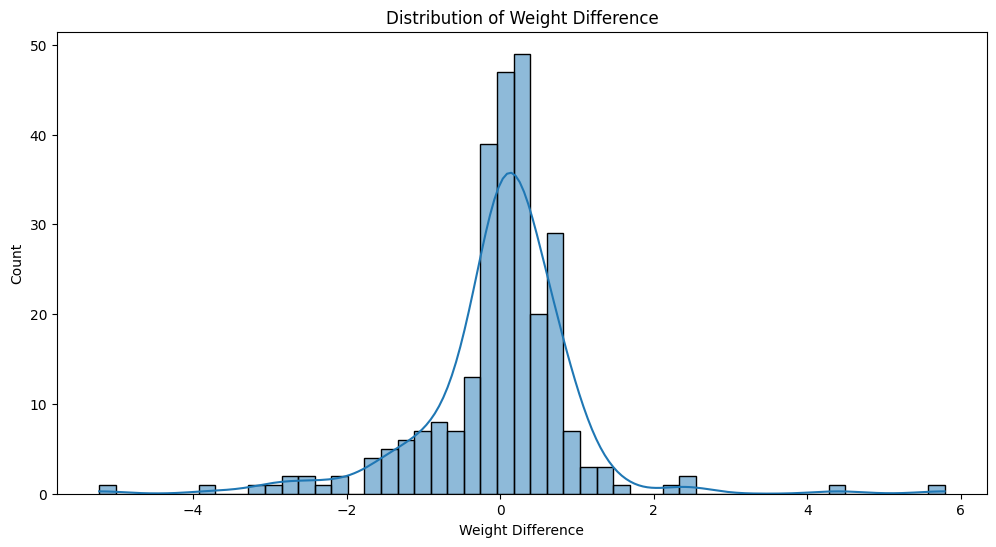

In [ ]:
# Understanding the distrubution of numeric variable after scaling
plt.figure(figsize=(12, 6))
sns.histplot(df['Weight Difference'], kde=True)
plt.title('Distribution of Weight Difference')
plt.show()

# 6. Dimensionality Reduction (Optional)



1.    In dimensionality reduction, particularly with PCA (Principal Component Analysis), only numerical data can be directly processed. Categorical data needs to be handled separately, typically by encoding or other methods. Identifying these column types is the first step towards preparing the data for PCA.
2.   PCA is sensitive to the variances in the data, so scaling is crucial to ensure that all numerical features contribute equally to the analysis. Without scaling, features with larger ranges could dominate the principal components.
3.  PCA reduces the complexity of the data by transforming it into a set of principal components that capture the most variance in the data. By reducing the data to two principal components (PC1 and PC2), the essential structure of the data can be visualized in a 2D space.
4. After dimensionality reduction, it is often useful to retain categorical data for further analysis or interpretation. By combining the PCA components with the categorical data, the dataset is kept comprehensive, allowing for more meaningful analysis that includes both numerical patterns and categorical distinctions.



In [ ]:
# Step 1: Identify Numerical and Categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Scale the Numeric Columns
scaled_numeric = scaler.fit_transform(df[numeric_columns])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_columns)

# Step 3: Apply PCA to the Scaled Numeric Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_numeric_df)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])


# Step 4: Combine PCA components with the original categorical columns
df_final = pd.concat([pca_df, df[categorical_columns].reset_index(drop=True)], axis=1)

# Display the final DataFrame
df_final.head()

,PC1,PC2,Type,Refinery,Origin Departure Date,Destination Arrival Date
0,0.195907,-0.867298,VB,Tehran,1398/12/28,1399/01/01
1,0.557553,-0.874384,VB,Tehran,1398/12/28,1399/01/01
2,-1.726476,0.046539,VB,Tehran,1398/12/27,1399/01/01
3,-0.104629,-3.564714,VB,Tehran,1398/12/28,1399/01/01
4,-2.091995,-0.006847,VB,Tehran,1398/12/29,1399/01/02




*    The scatter plot allows for the visualization of the reduced data in 2D space, with points color-coded by the Refinery category. This can reveal patterns or clusters within the data that might correspond to different refineries, indicating how the categories are separated or overlap in the principal component space.
*   If distinct clusters are visible in the plot, it suggests that the PCA successfully captured differences between the categories in the reduced dimensions. If the points are more scattered and overlapping, it might indicate that the principal components do not clearly separate these categories.



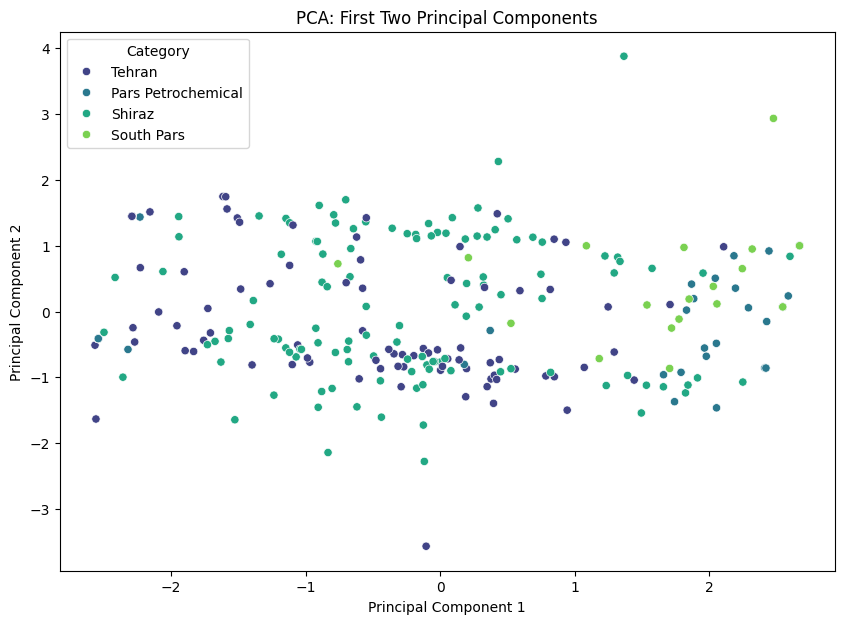

In [ ]:
pca_df['Category'] = df['Refinery'].reset_index(drop=True)

# Plot the PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Category', data=pca_df, palette='viridis')

# Add titles and labels
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the plot
plt.show()


*  The first two principal components capture a significant portion of the variance in the data, but they do not completely separate the refinery categories. This suggests that while PCA has reduced dimensionality and simplified the dataset, more components might be necessary to fully distinguish between the refineries.
*  The overlapping of categories in the PCA space indicates that the features used for PCA might not be strongly predictive of refinery type. Alternatively, it could suggest that the refinery categories share many similarities in the measured features.

# 7. Feature Selection

This correlation matrix provides clear insights into how your numerical features are related. It is a valuable tool for guiding feature selection by identifying which features can be removed due to redundancy and which should be retained for their unique contributions.

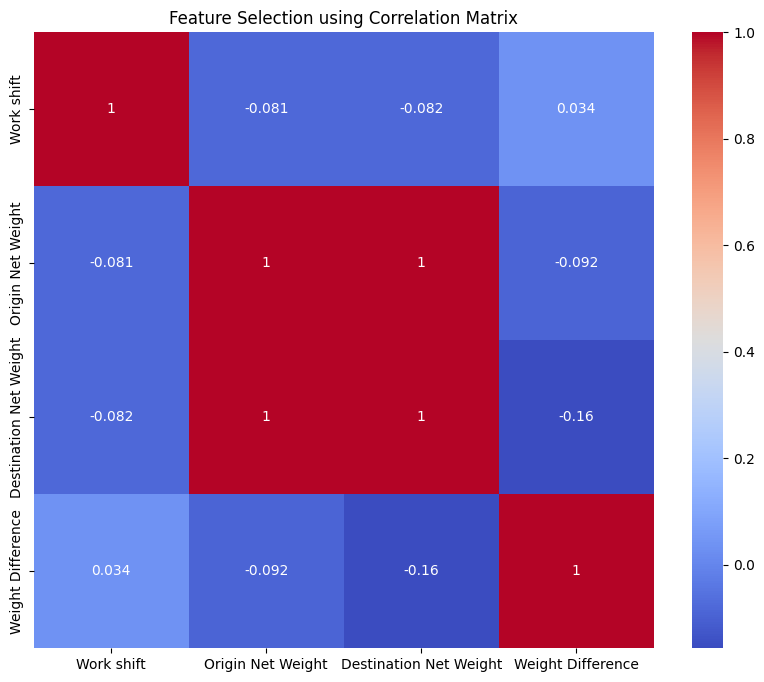

In [ ]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Selection using Correlation Matrix')
plt.show()